In [1]:
from IPython.display import Image

In [2]:
import numpy as np

np.random.seed(42) 
m = 100
X = 2*np.random.rand(m,1) 
a_0, a_1 = 4, 3 
y = a_0 + a_1 * X + np.random.randn(m,1) 

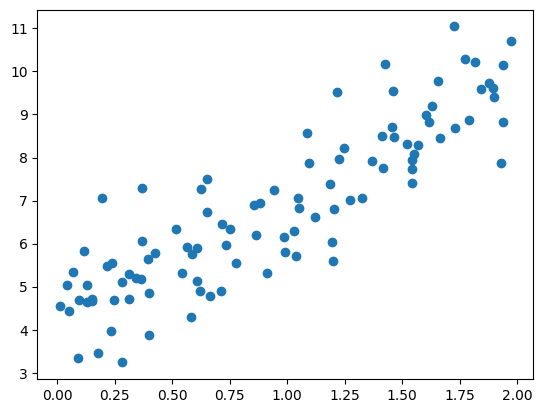

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [4]:
# dodajmy jedynkę do naszej tabeli 
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

In [6]:
# rozwiązanie analityczne 
alpha_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [7]:
alpha_best, np.array([4,3])

(array([[4.21509616],
        [2.77011339]]),
 array([4, 3]))

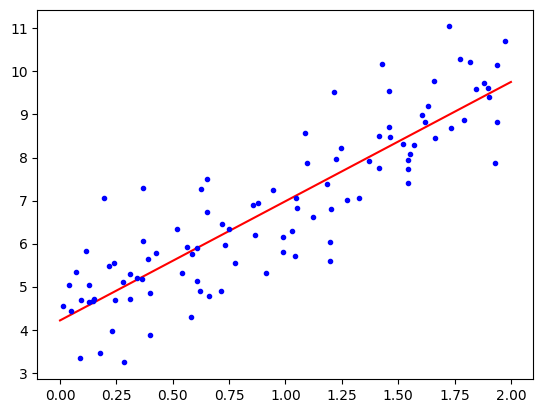

In [8]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ alpha_best

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="prediction")
plt.plot(X,y, "b.")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y) 

print(f"a_0={lin_reg.intercept_[0]}, a_1 = {lin_reg.coef_[0][0]}")

print("predykcja", lin_reg.predict(X_new))

a_0=4.215096157546747, a_1 = 2.7701133864384837
predykcja [[4.21509616]
 [9.75532293]]


In [10]:
# Logistic Regression w scikit learn oparta jest o metodę lstsq 
alpha_best_svd, _, _, _ = np.linalg.lstsq(X_b, y, rcond=1e-6)
alpha_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
eta = 0.1
n_epochs = 1000
m = len(X_b)
np.random.seed(42) 
alpha = np.random.randn(2,1) # losowo wybieramy rozwiązanie

for epoch in range(n_epochs):
    gradients = 2/m* X_b.T @ (X_b @ alpha - y)
    #print(alpha)
    alpha = alpha - eta*gradients

In [13]:
alpha

array([[4.21509616],
       [2.77011339]])

In [14]:
n_epochs = 50
m = len(X_b)


def learning_schedule(t, t0=5, t1=50):
    return t0/(t+t1)

np.random.seed(42)
alpha = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1] 
        gradients = 2 * xi.T @ (xi @ alpha - yi)
        eta = learning_schedule(epoch * m + iteration) 
        alpha = alpha - eta * gradients
        

In [15]:
alpha

array([[4.21076011],
       [2.74856079]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, 
                       penalty=None, eta0=0.01, 
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [18]:
from random import randint

class Kosc():
    """opis"""
    def __init__(self, sciany=6):
        """ ops metody """
        self.sciany = sciany
        
    def roll(self):
        """opis metody """
        return randint(1,self.sciany)

a = Kosc()
[a.roll() for _ in range(10)]

[2, 3, 2, 4, 2, 6, 5, 4, 2, 1]

In [19]:
from random import choice

class RandomWalk():
    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]
    
    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1,1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance
            
            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance
            
            if x_step == 0 and y_step == 0:
                continue
            
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)

rw = RandomWalk()
rw.x_values
rw2 = RandomWalk(num_points=10000)
rw2.num_points

rw.fill_walk()

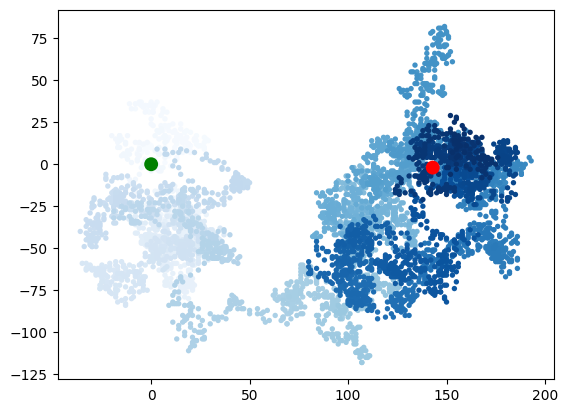

In [20]:
import matplotlib.pyplot as  plt
point_number = list(range(rw.num_points))
plt.scatter(rw.x_values, rw.y_values, c=point_number, cmap=plt.cm.Blues,
           edgecolor='none', s=15)
plt.scatter(0,0,c='green', edgecolor='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1],c='red', edgecolor='none', s=100)

plt.show()

In [ ]:
#################################

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [22]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[0:100,4].values
y = np.where(y == 0, -1, 1)

import matplotlib.pyplot as plt

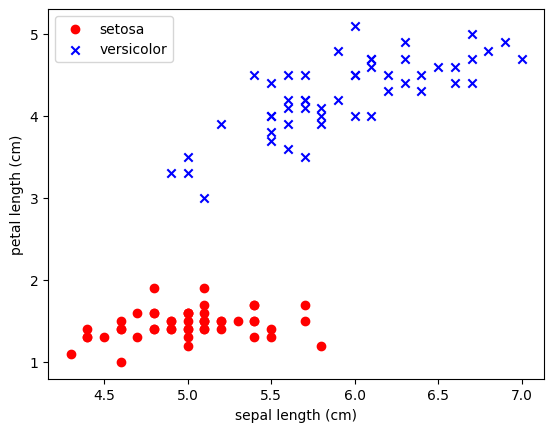

In [23]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

In [24]:
class Perceptron():
    def __init__(self, n_iter=10, eta=0.01):
        self.n_iter = n_iter
        self.eta = eta
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            pass
        return self

In [25]:
import random

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        #self.w_ = np.zeros(1+X.shape[1])
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

In [26]:
# uzycie jak wszsytkie klasy sklearn
ppn = Perceptron()
ppn.fit(X,y)

In [27]:
ppn.predict(np.array([-3, 5]))

array(-1)

In [28]:
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(ppn, picklefile)

In [29]:
# dodatkowa funkcja

from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

# dla kwiatków

C:\Users\janek\AppData\Local\Temp\ipykernel_18780\2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


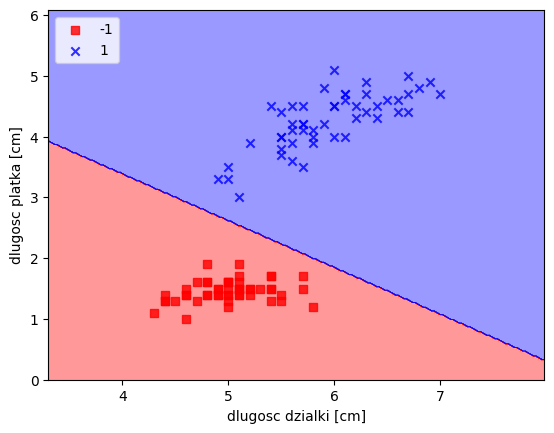

In [30]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [31]:
# ZADANIE - Opisz czym różni się poniższy algorytm od Perceprtona ? 
class Adaline():
    '''Klasyfikator  - ADAptacyjny LIniowy NEuron'''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X,y):
        #self.w_ = np.zeros(1+X.shape[1])
        import random
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])]
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1) 

[-1.2946371772205486e+31, -7.230488643107472e+31, -4.0453488316836827e+31]


C:\Users\janek\AppData\Local\Temp\ipykernel_18780\2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


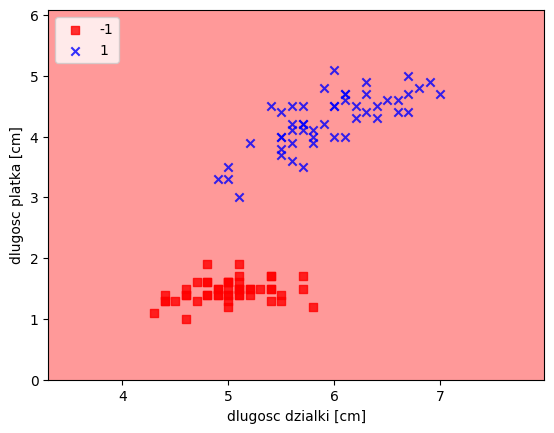

In [32]:
ad = Adaline(n_iter=20, eta=0.01)

ad.fit(X,y)

print(ad.w_)

plot_decision_regions(X,y,classifier=ad)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

C:\Users\janek\AppData\Local\Temp\ipykernel_18780\2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


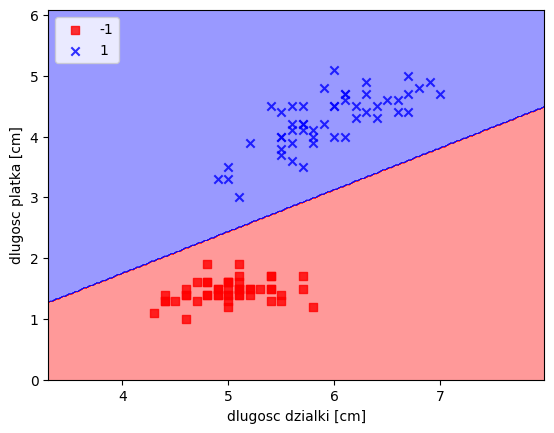

In [33]:
ad2 = Adaline(n_iter=100, eta=0.0001)

ad2.fit(X,y)

plot_decision_regions(X,y,classifier=ad2)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [1]:
%%file app.py

import pickle
import numpy as np
from flask import Flask, request, jsonify

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/predict_get', methods=['GET'])
def get_prediction():
    # sepal length
    sepal_length = float(request.args.get('sl'))
    petal_length = float(request.args.get('pl'))
    
    features = [sepal_length, petal_length]

    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
        
    # Predict the class using the model
    predicted_class = int(model.predict(features))
    
    # Return a json object containing the features and prediction
    return jsonify(features=features, predicted_class=predicted_class)

@app.route('/predict_post', methods=['POST'])
def post_predict():
    data = request.get_json(force=True)
    # sepal length
    sepal_length = float(data.get('sl'))
    petal_length = float(data.get('pl'))
    
    features = [sepal_length, petal_length]

    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
        
    # Predict the class using the model
    predicted_class = int(model.predict(features))
    output = dict(features=features, predicted_class=predicted_class)
    # Return a json object containing the features and prediction
    return jsonify(output)


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

Overwriting app.py


In [2]:
import requests
response = requests.get("http://127.0.0.1:5000/predict_get?sl=6.3&pl=2.6")
print(response.content)

b'{"features":[6.3,2.6],"predicted_class":1}\n'


In [3]:
import requests
json = {"sl":2.4, "pl":2.6}
response = requests.post("http://127.0.0.1:5000/predict_post", json=json)
print(response.content)

b'{"features":[2.4,2.6],"predicted_class":-1}\n'
